In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Carpeta sin título/data/Precios_casas.csv', sep=';', decimal=',')
df.shape

(506, 14)

In [ ]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,502.000000,503.000000,501.000000,504.000000,503.000000,501.000000,503.000000,504.000000,502.000000,498.000000,506.000000,505.000000,506.000000,506.000000
mean,3.640195,11.365805,11.169261,0.069444,0.555031,6.282673,68.504970,3.798096,9.601594,405.554217,18.455534,356.594376,12.653063,22.532806
std,8.630553,23.361088,6.864633,0.254461,0.116063,0.703639,28.194473,2.107387,8.721955,167.277267,2.164946,91.367787,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,44.700000,2.100525,4.000000,279.000000,17.400000,375.330000,6.950000,17.025000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.208000,77.300000,3.207450,5.000000,330.000000,19.050000,391.430000,11.360000,21.200000
75%,3.689388,12.500000,18.100000,0.000000,0.624000,6.619000,94.050000,5.212575,24.000000,666.000000,20.200000,396.210000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Input features in order:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per \$10,000 [\$/10k]
- PTRATIO: pupil-teacher ratio by town
- B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

Output variable:
- MEDV: Median value of owner-occupied homes in \$1000's [k\$]

In [ ]:
df.isna().sum()

CRIM       4
ZN         3
INDUS      5
CHAS       2
NOX        3
RM         5
AGE        3
DIS        2
RAD        4
TAX        8
PTRATIO    0
B          1
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.shape

(469, 14)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [ ]:
from scipy.stats import zscore
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

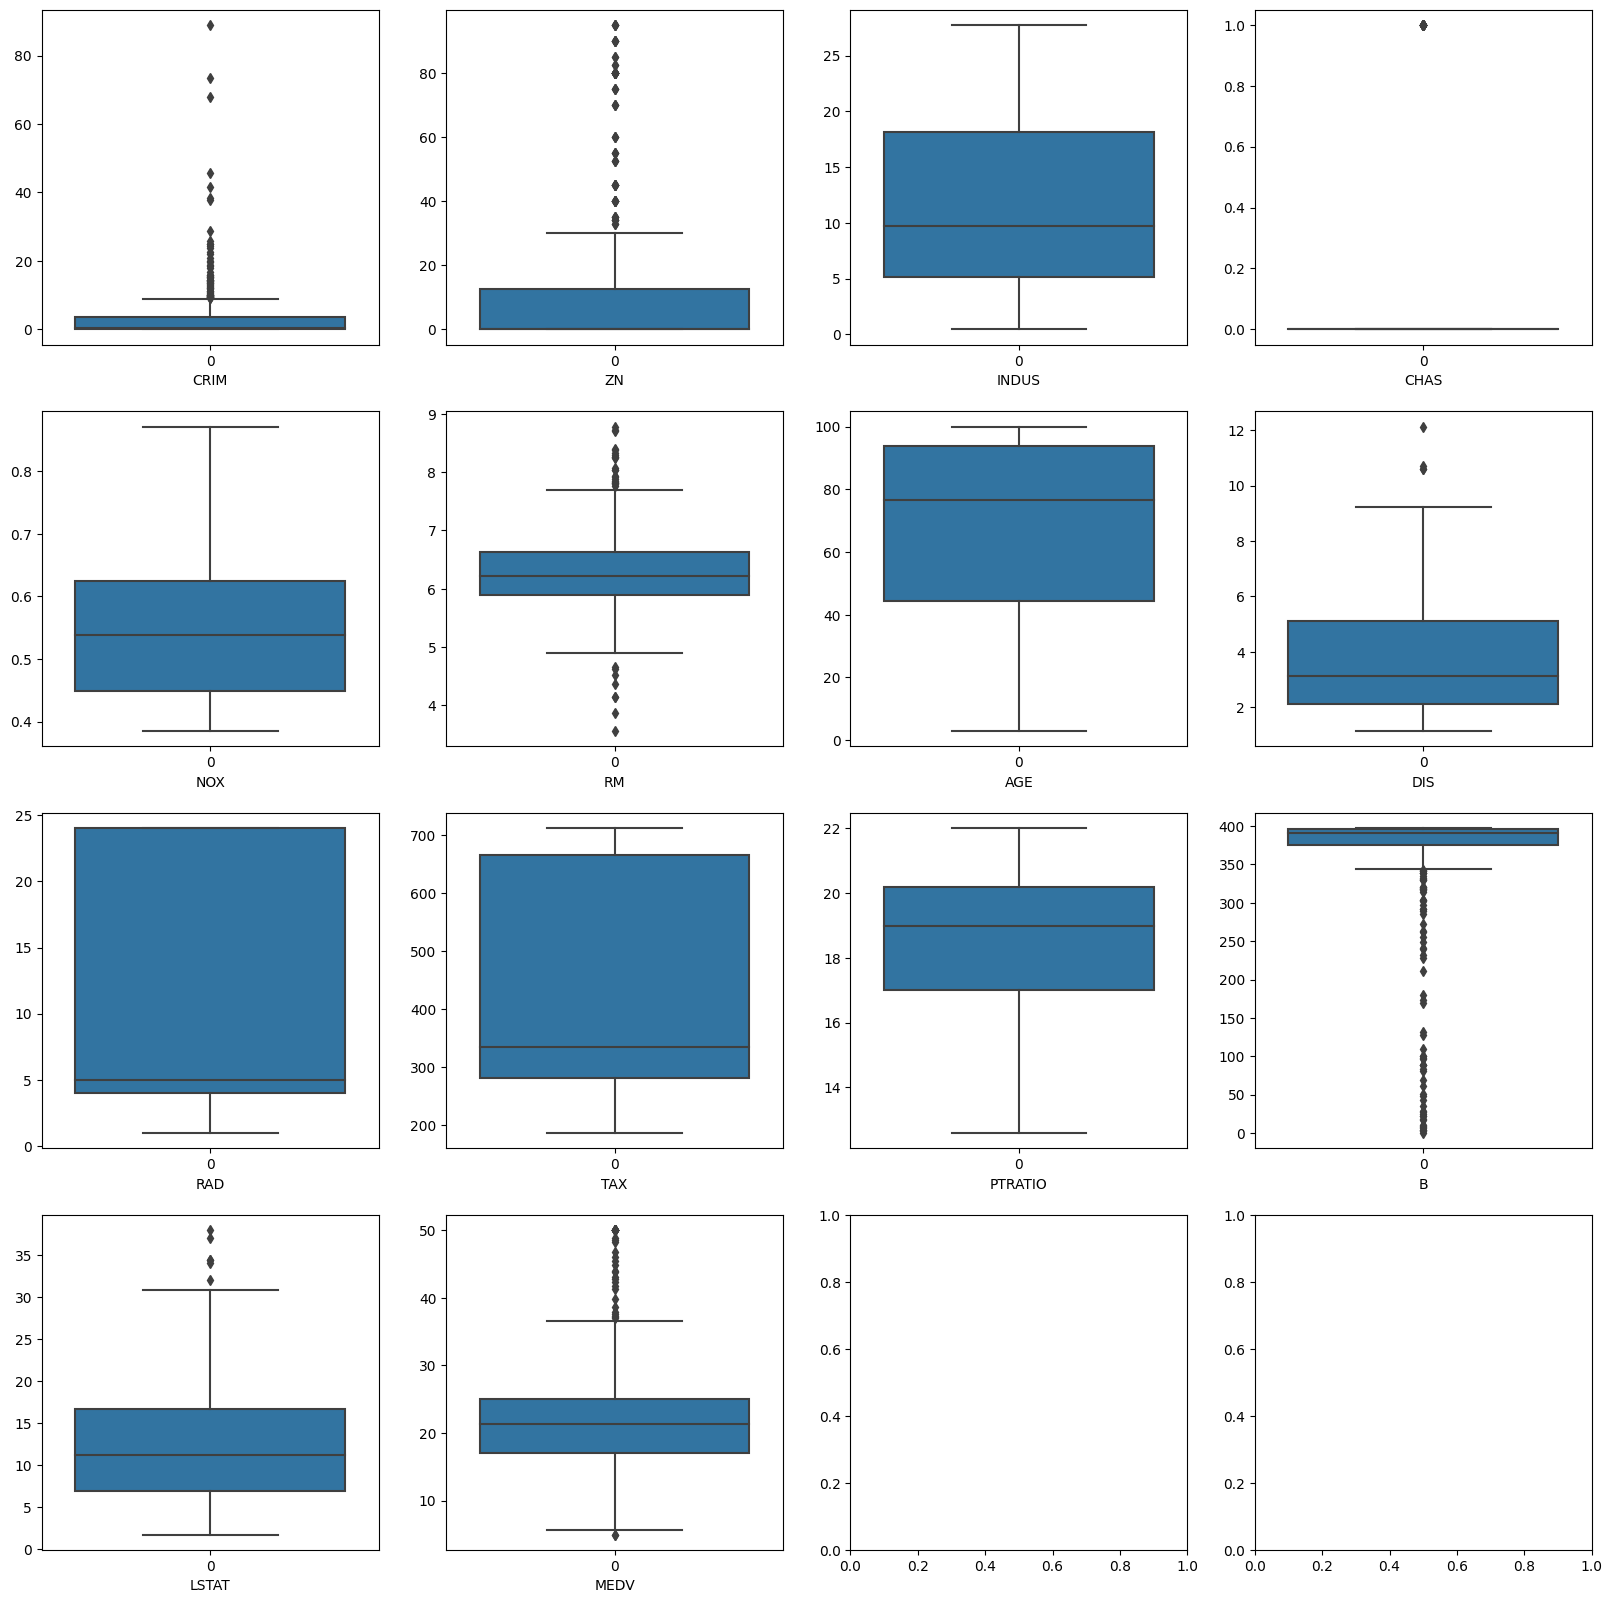

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
cols = df.columns

i = 0
j = 0
for c in cols:
  sns.boxplot(data=df[c], ax=axs[i,j])
  axs[i,j].set_xlabel(c)
  j+=1
  if j == 4:
    i += 1
    j = 0

plt.show()

In [ ]:
for c in cols:
  z = np.abs(stats.zscore(df.loc[:,c]))
  print('Outliers en',c,'son', np.where(z >3))

Outliers en CRIM son (array([350, 363, 369, 370, 378, 381, 390]),)
Outliers en ZN son (array([ 45,  46, 178, 179, 180, 181, 182, 183, 235, 258, 259, 320, 325]),)
Outliers en INDUS son (array([], dtype=int64),)
Outliers en CHAS son (array([121, 131, 133, 134, 139, 141, 142, 187, 188, 189, 190, 191, 195,
       197, 198, 199, 200, 201, 213, 215, 248, 249, 251, 252, 257, 258,
       328, 329, 330, 335, 336, 341, 342]),)
Outliers en NOX son (array([], dtype=int64),)
Outliers en RM son (array([204, 236, 336, 337, 339, 344, 371]),)
Outliers en AGE son (array([], dtype=int64),)
Outliers en DIS son (array([324, 325, 326, 327]),)
Outliers en RAD son (array([], dtype=int64),)
Outliers en TAX son (array([], dtype=int64),)
Outliers en PTRATIO son (array([], dtype=int64),)
Outliers en B son (array([375, 376, 379, 381, 382, 386, 387, 388, 389, 390, 392, 393, 394,
       399, 400, 401, 408, 413, 417, 418, 419, 420, 429]),)
Outliers en LSTAT son (array([120, 344, 376, 378, 401]),)
Outliers en MEDV son

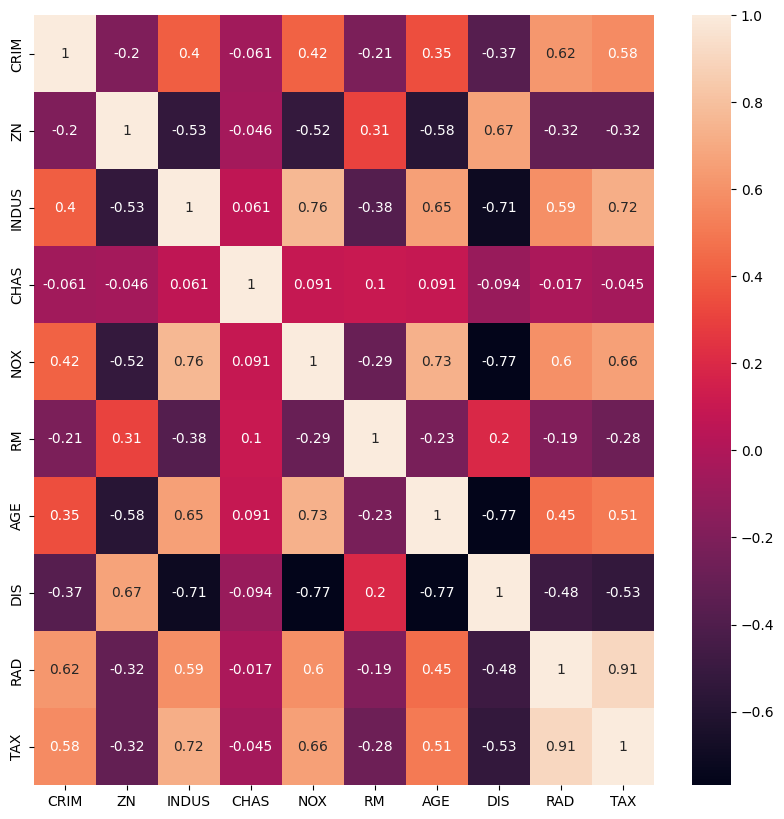

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(data=df.iloc[:,0:10].corr(), annot=True, ax = ax);

In [ ]:
y_reg = np.array(df['MEDV'])
X_reg = np.array(df.drop('MEDV', axis=1))
names = list(df.columns)
mean_y = np.nanmean(y_reg)

# Normalizar mediante escalado
from sklearn.preprocessing import MinMaxScaler
scal_y_reg = MinMaxScaler(feature_range=(0,1))
scal_x_reg = MinMaxScaler(feature_range=(0,1))
scal_y_reg.fit(y_reg.reshape(-1,1))
scal_x_reg.fit(X_reg)

y_reg = scal_y_reg.transform(y_reg.reshape(-1,1))
X_reg = scal_x_reg.transform(X_reg)

print(X_reg)

[[0.00000000e+00 1.89473684e-01 6.78152493e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  9.91300620e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.69701987e-01]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size = 0.1, random_state = 7)

print('Training shape:', X_train_reg.shape)
print('Test shape:', X_test_reg.shape)

Training shape: (422, 13)
Test shape: (47, 13)


# **Regresión lineal**

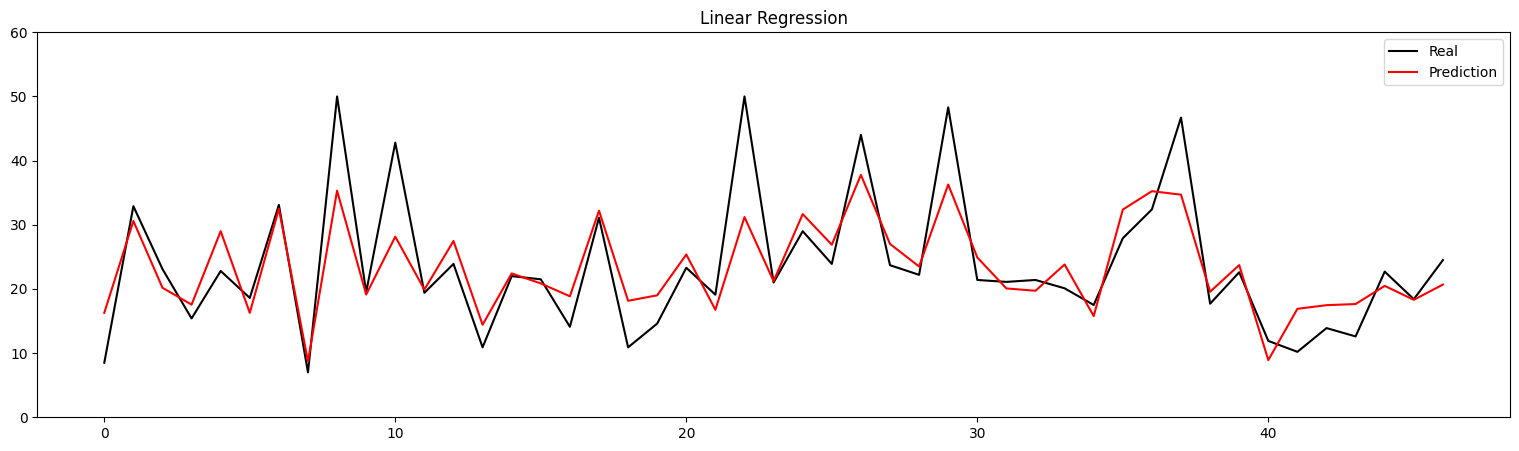

In [ ]:
from sklearn import datasets, linear_model, metrics

reg = linear_model.LinearRegression()
reg.fit(X_train_reg, y_train_reg)

y_pred_reg = reg.predict(X_test_reg)

y_pred_reg = scal_y_reg.inverse_transform(y_pred_reg)
y_real = scal_y_reg.inverse_transform(y_test_reg)

fig, ax = plt.subplots(1,1, figsize=(19,5))
ax.plot(range(len(y_real)), y_real, color='black', label='Real')
ax.plot(range(len(y_pred_reg)), y_pred_reg, color='red', label='Prediction')
plt.ylim(0,60)
plt.legend()
plt.title('Linear Regression')
plt.show()

cv_rmse_reg = 100 * (np.sqrt(metrics.mean_squared_error(y_real, y_pred_reg))/ mean_y)

# **Random forest**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor

def define_models():
	models = dict()
	n_trees = [5,10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestRegressor(n_estimators=n)
	return models

def evaluate_model(model, X, y):
	scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
	return scores

models = define_models()
resultados, opciones = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train_reg, y_train_reg)
	resultados.append(scores)
	opciones.append(name)

	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>5 -0.007 (0.001)
>10 -0.007 (0.002)
>50 -0.006 (0.001)
>100 -0.006 (0.001)
>500 -0.006 (0.001)
>1000 -0.006 (0.001)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, random_state=7)
model.fit(X_train_reg, y_train_reg)

y_pred_forest = model.predict(X_test_reg)

y_pred_forest = scal_y_reg.inverse_transform(y_pred_forest.reshape(-1,1))
y_real = scal_y_reg.inverse_transform(y_test_reg)

<ipython-input-116-c30af5654300>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_reg, y_train_reg)


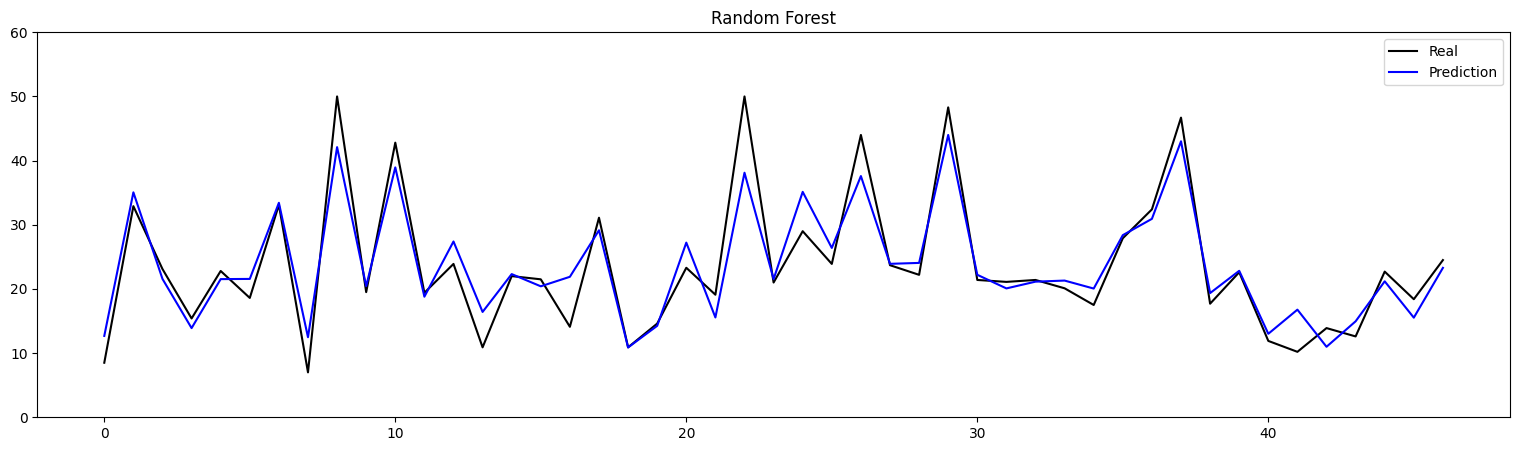

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(19,5))
ax.plot(range(len(y_real)), y_real, color='black', label='Real')
ax.plot(range(len(y_pred_forest)), y_pred_forest, color='blue', label='Prediction')
plt.ylim(0,60)
plt.legend()
plt.title('Random Forest')
plt.show()

cv_rmse_forest = 100 * (np.sqrt(metrics.mean_squared_error(y_real, y_pred_forest))/ mean_y)

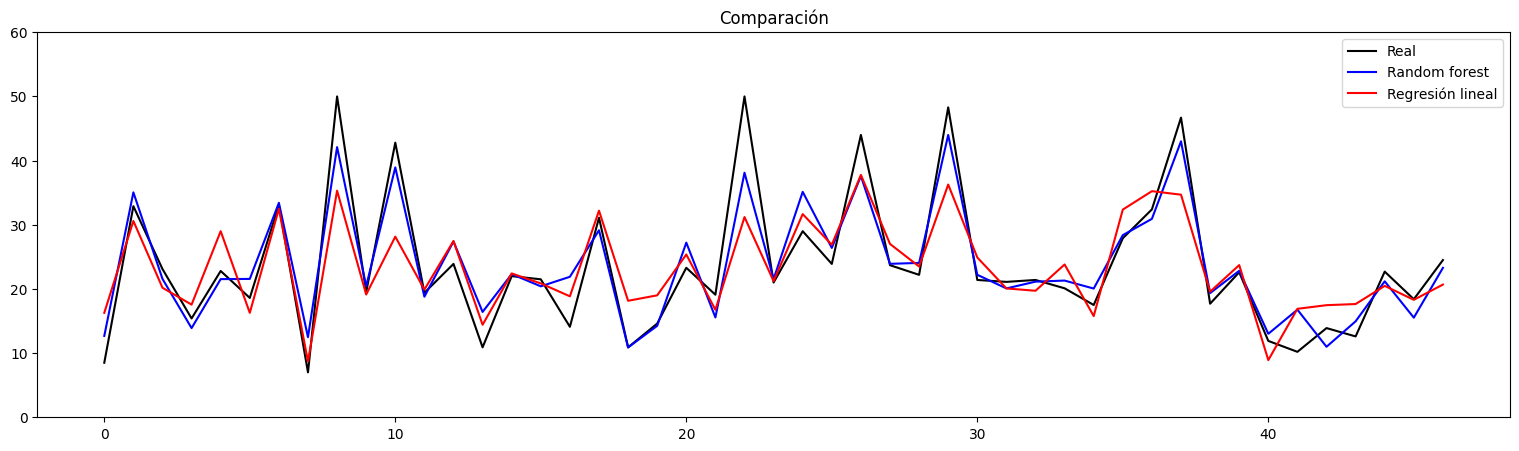

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(19,5))
ax.plot(range(len(y_real)), y_real, color='black', label='Real')
ax.plot(range(len(y_pred_forest)), y_pred_forest, color='blue', label='Random forest')
ax.plot(range(len(y_pred_reg)), y_pred_reg, color='red', label='Regresión lineal')
plt.ylim(0,60)
plt.legend()
plt.title('Comparación')
plt.show()

In [ ]:
print('El error medio en la predicción con regresión lineal es:',cv_rmse_reg)
print('El error medio en la predicción con Random forest es:',cv_rmse_forest)
print('Mediana de y:',mean_y)

El error medio en la predicción con regresión lineal es: 25.60163850055442
El error medio en la predicción con Random forest es: 16.187053460118495
Mediana de y: 22.612793176972286
